In [110]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
import plotly as py

from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering 

from scipy.spatial import distance_matrix 
from scipy.cluster import hierarchy 
from scipy.cluster.hierarchy import fcluster

import scipy.cluster.hierarchy as sch

In [5]:
df = pd.read_csv('data/customers.csv')
df = df.drop('cluster',axis=1)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [6]:
df.shape

(200, 5)

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

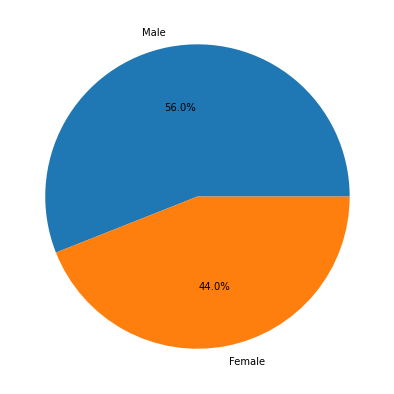

In [10]:
fig = plt.figure(figsize =(10, 7))
labels =['Male','Female']
size=df.Gender.value_counts()
plt.pie(size, labels = labels , autopct='%1.1f%%')
plt.show()

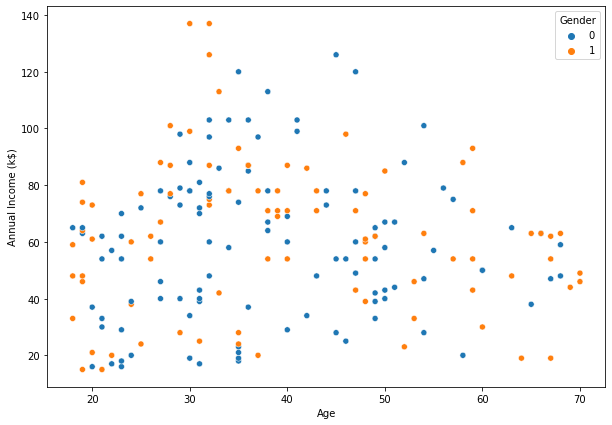

In [22]:
fig = plt.figure(figsize =(10, 7))
sns.scatterplot(data=df,x='Age',y='Annual Income (k$)',hue='Gender')
plt.show()

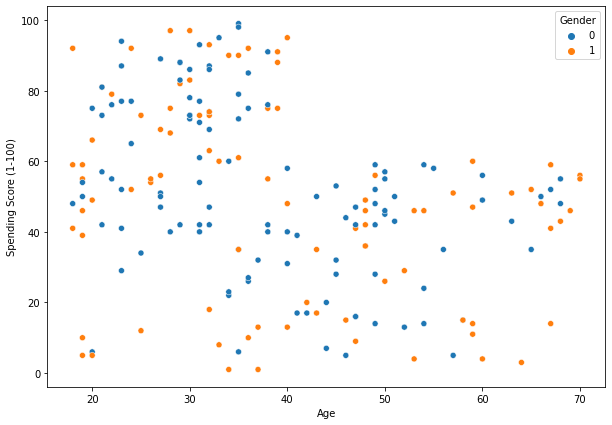

In [23]:
fig = plt.figure(figsize =(10, 7))
sns.scatterplot(data=df,x='Age',y='Spending Score (1-100)',hue='Gender')
plt.show()

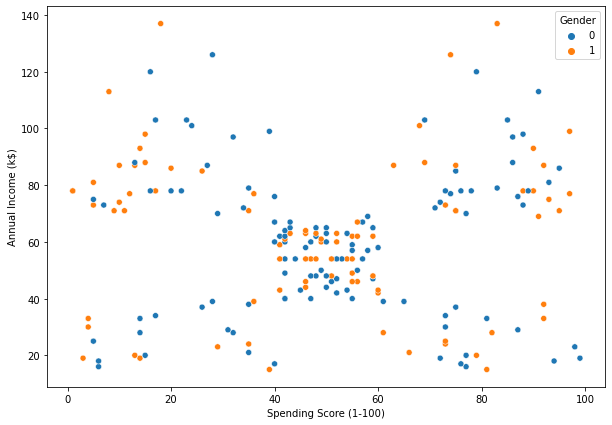

In [25]:
fig = plt.figure(figsize =(10, 7))
sns.scatterplot(data=df,x='Spending Score (1-100)',y='Annual Income (k$)',hue='Gender')
plt.show()

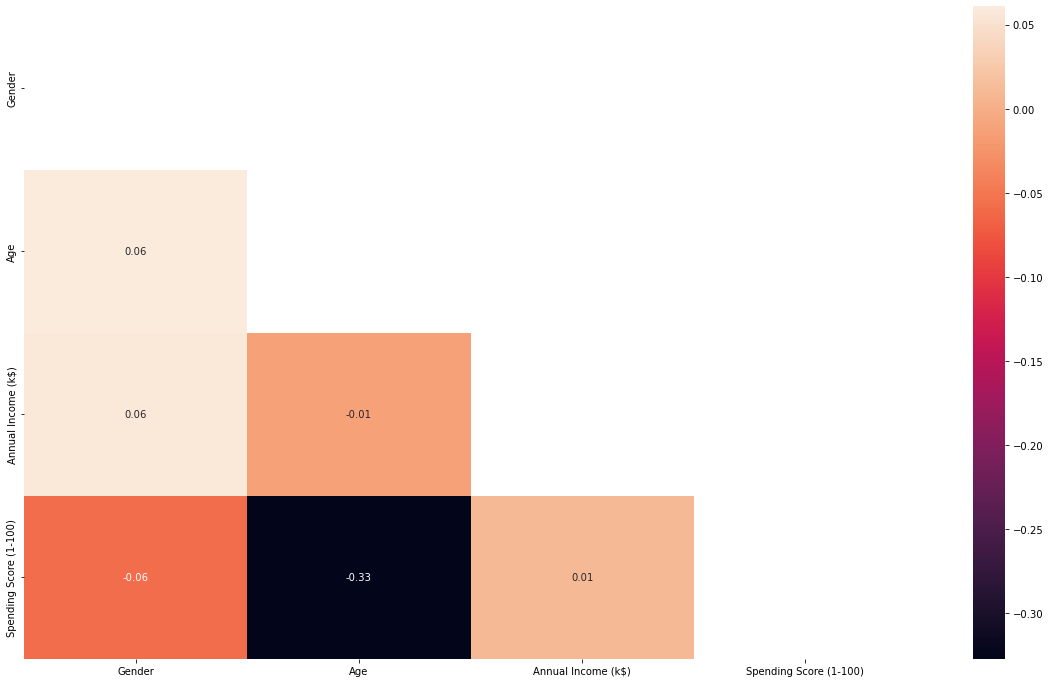

In [27]:
df = df.drop('CustomerID',axis=1)
plt.figure(figsize = (20, 12))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask,  annot = True, fmt = ".2f")
plt.show()

In [89]:
agglom = AgglomerativeClustering(n_clusters = 5, linkage = 'average')
agglom.fit(df)

AgglomerativeClustering(linkage='average', n_clusters=5)

In [90]:
df['label1'] = agglom.labels_

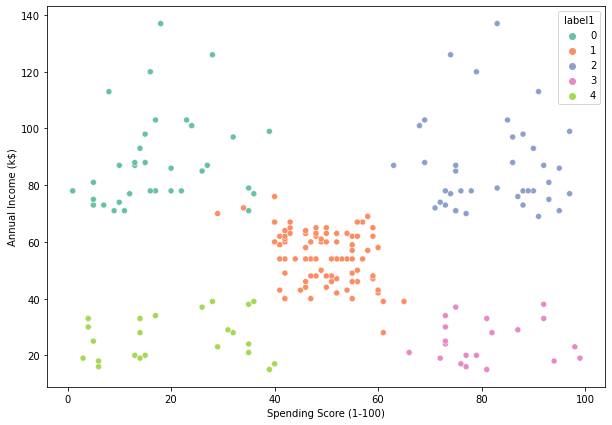

In [91]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df,x='Spending Score (1-100)',y='Annual Income (k$)',hue='label1',palette="Set2")
plt.show()

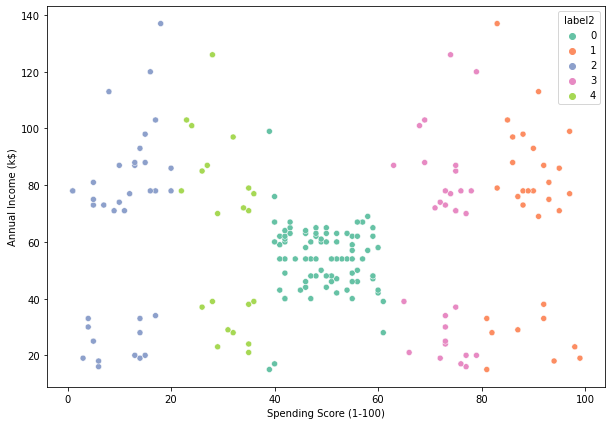

In [93]:
agglom2 = AgglomerativeClustering(n_clusters = 5, linkage = 'complete')
agglom2.fit(df[['Spending Score (1-100)']],df[['Annual Income (k$)']])
df['label2'] = agglom2.labels_
plt.figure(figsize=(10,7))
sns.scatterplot(data=df,x='Spending Score (1-100)',y='Annual Income (k$)',hue='label2',palette="Set2")
plt.show()

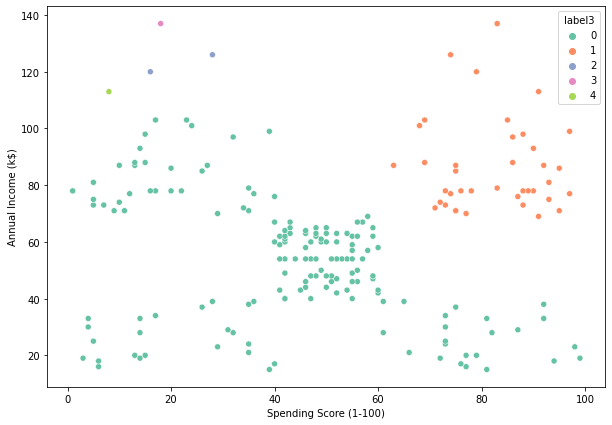

In [94]:
agglom3 = AgglomerativeClustering(n_clusters = 5, linkage = 'single')
agglom3.fit(df)
df['label3'] = agglom3.labels_

plt.figure(figsize=(10,7))
sns.scatterplot(data=df,x='Spending Score (1-100)',y='Annual Income (k$)',hue='label3', palette="Set2")
plt.show()

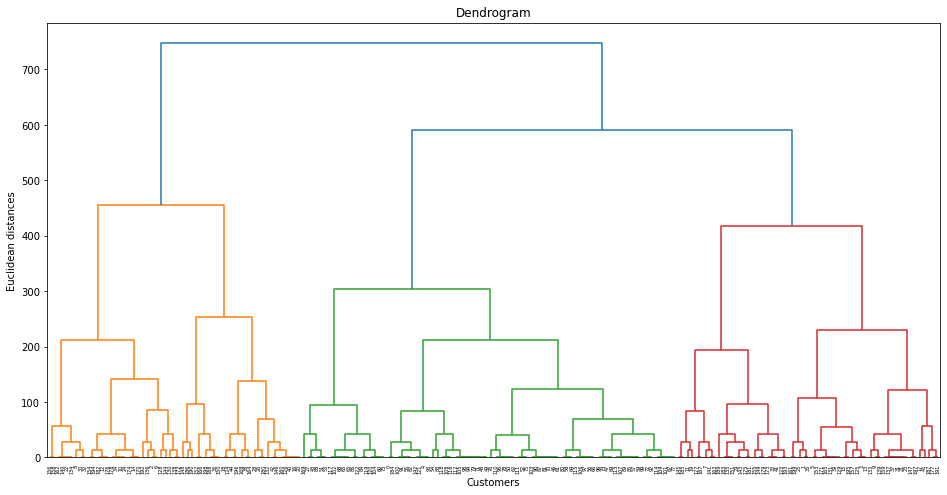

In [100]:
dist_matrix = distance_matrix(df[['Spending Score (1-100)']],df[['Annual Income (k$)']]) 
Z = hierarchy.linkage(dist_matrix, 'complete')

plt.figure(figsize=(16,8))
dendro = hierarchy.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

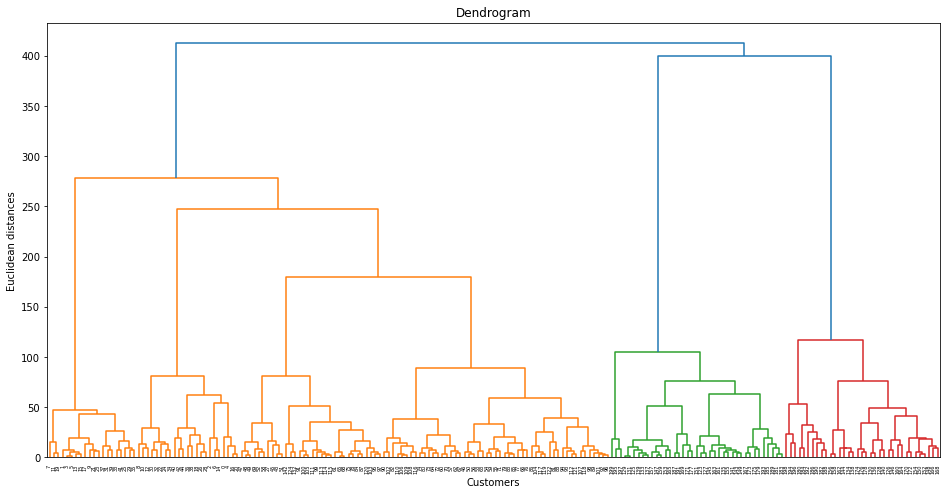

In [101]:
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(df, method  = "ward"))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

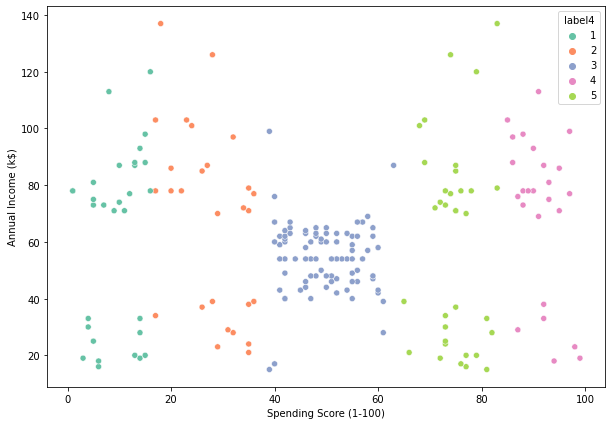

In [97]:
clusters = fcluster(Z, 5, criterion='maxclust')
df['label4'] = clusters

plt.figure(figsize=(10,7))
sns.scatterplot(data=df,x='Spending Score (1-100)',y='Annual Income (k$)',hue='label4', palette="Set2")
plt.show()

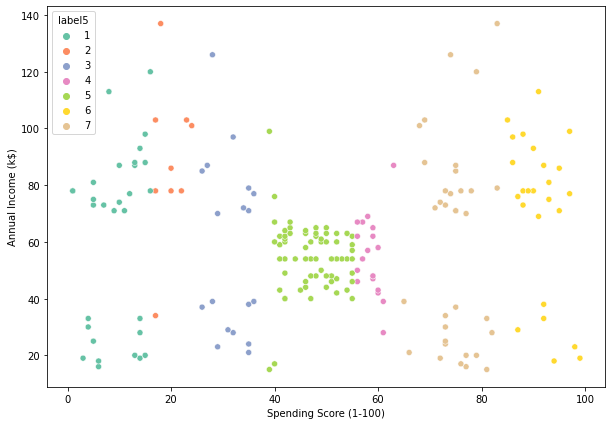

In [98]:
clusters2 = fcluster(Z, 7, criterion='maxclust')
df['label5'] = clusters2

plt.figure(figsize=(10,7))
sns.scatterplot(data=df,x='Spending Score (1-100)',y='Annual Income (k$)',hue='label5', palette="Set2")
plt.show()

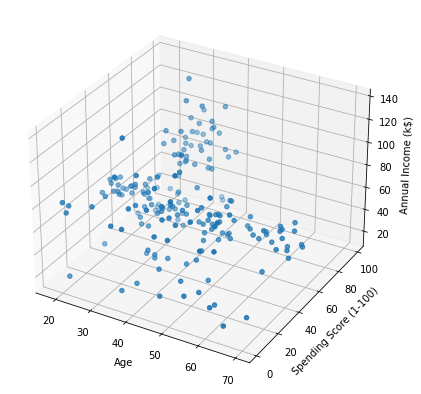

In [103]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(projection='3d')
ax.scatter(df[['Age']], df[['Spending Score (1-100)']],df[['Annual Income (k$)']])
ax.set_xlabel('Age')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Annual Income (k$)')

plt.show()

In [117]:
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['label1'], 
        size= 5,
        line=dict(
            color= df['label1'],
            width= 22
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters using Agglomerative Clustering',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)
